In [ ]:
"""SuperStore Analysis By Liyanda Ngcobo"""
import pandas as pd

df = pd.read_csv('Super Store Dashboard/superstore Delete.csv', encoding='latin1')
df.dropna(inplace=True)

In [23]:
print(df.describe())
print(df['Category'].value_counts())
print(df['Region'].unique())


            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
['South' 'West' 'Ce

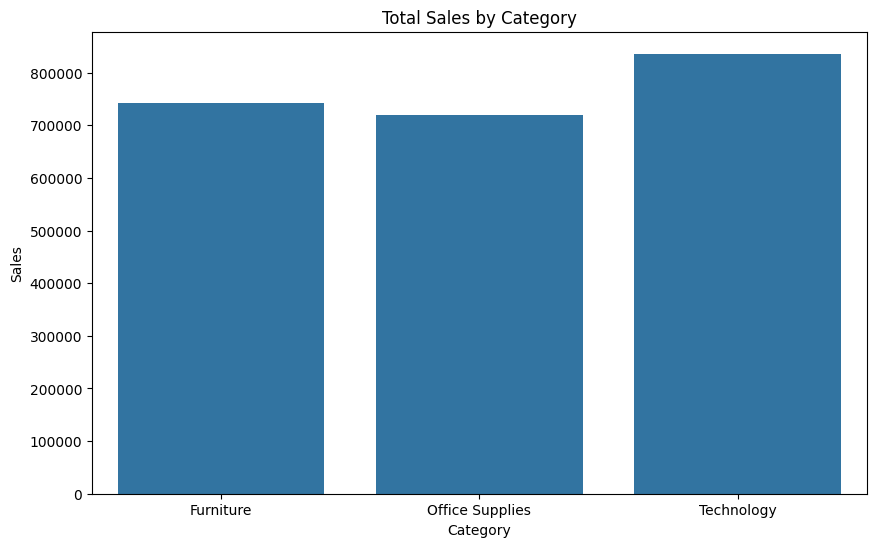

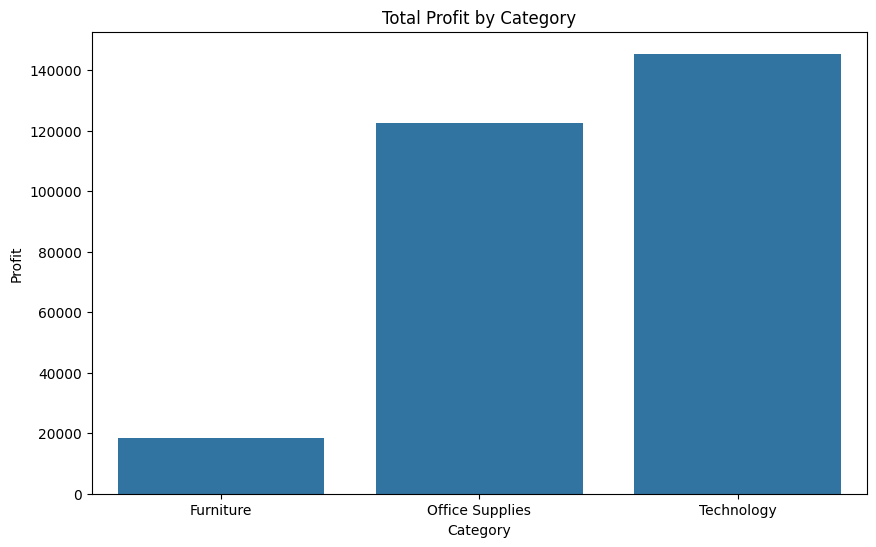

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=category_summary, x='Category', y='Sales')
plt.title('Total Sales by Category')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=category_summary, x='Category', y='Profit')
plt.title('Total Profit by Category')
plt.show()


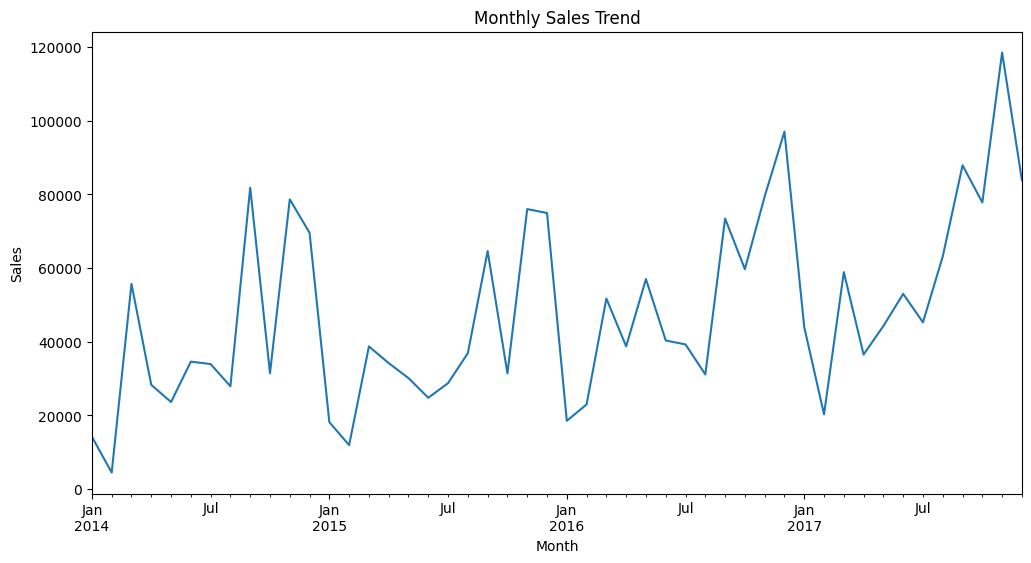

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

monthly_sales.plot(kind='line', figsize=(12,6), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


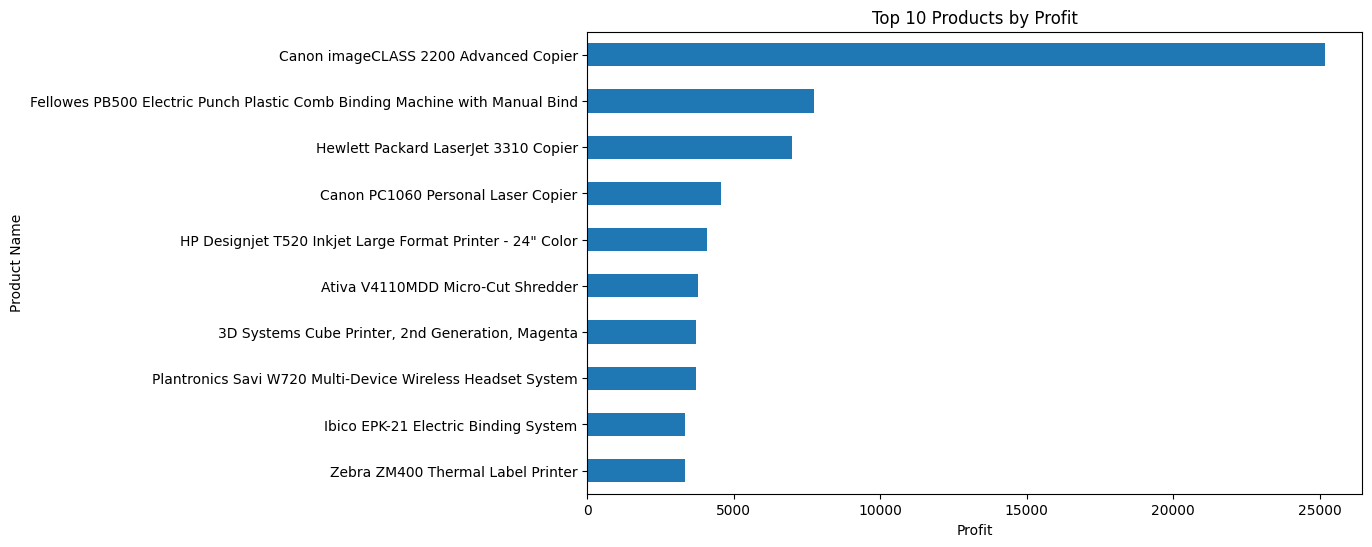

In [27]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10,6), title='Top 10 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()
